In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from joblib import dump, load
from sklearn.metrics import accuracy_score, precision_score

In [2]:
STI_Diagnose = pd.read_csv('STI_data.csv')
STI_Diagnose.head()

,Age,Sex,Painful_Urination,Vaginal_or_Penile_Discharge,Anal_itching,Sore_Throat,STI_Diagnose
0,63,0,1,0,0,1,0
1,26,1,1,0,0,0,0
2,57,0,1,0,1,1,1
3,40,1,1,0,0,1,1
4,61,0,1,0,1,1,1


In [3]:
STI_Diagnose.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2392.0,42.137960,21.606655,5.0,23.0,42.0,61.0,79.0
Sex,2392.0,0.493311,0.500060,0.0,0.0,0.0,1.0,1.0
Painful_Urination,2392.0,0.827341,0.378031,0.0,1.0,1.0,1.0,1.0
Vaginal_or_Penile_Discharge,2392.0,0.141722,0.348838,0.0,0.0,0.0,0.0,1.0
Anal_itching,2392.0,0.500418,0.500104,0.0,0.0,1.0,1.0,1.0
Sore_Throat,2392.0,0.503344,0.500093,0.0,0.0,1.0,1.0,1.0
STI_Diagnose,2392.0,0.812709,0.390227,0.0,1.0,1.0,1.0,1.0


In [4]:
n_data = STI_Diagnose.dropna()

In [5]:
n_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2392.0,42.137960,21.606655,5.0,23.0,42.0,61.0,79.0
Sex,2392.0,0.493311,0.500060,0.0,0.0,0.0,1.0,1.0
Painful_Urination,2392.0,0.827341,0.378031,0.0,1.0,1.0,1.0,1.0
Vaginal_or_Penile_Discharge,2392.0,0.141722,0.348838,0.0,0.0,0.0,0.0,1.0
Anal_itching,2392.0,0.500418,0.500104,0.0,0.0,1.0,1.0,1.0
Sore_Throat,2392.0,0.503344,0.500093,0.0,0.0,1.0,1.0,1.0
STI_Diagnose,2392.0,0.812709,0.390227,0.0,1.0,1.0,1.0,1.0


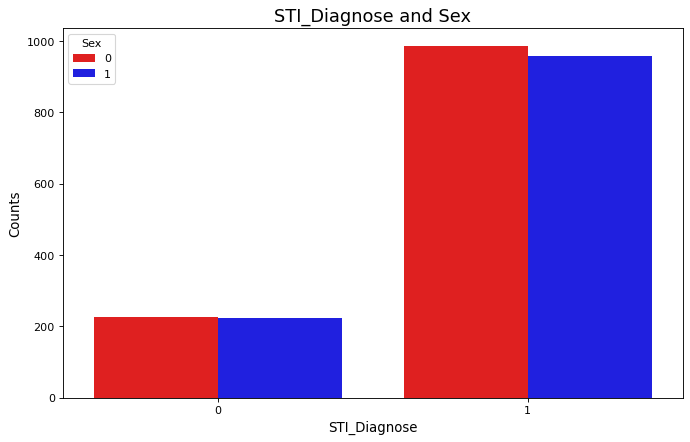

In [6]:
# Select the features for comparison
data = n_data[['STI_Diagnose', 'Sex']]

# Group the data without filtering out "Moderate Risk"
grouped_data = data.groupby(['STI_Diagnose', 'Sex']).size().reset_index(name='Counts')

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)

# Replace values with readable text
grouped_data['STI_Diagnose'] = grouped_data['STI_Diagnose']
grouped_data['Sex'] = grouped_data['Sex']

# Create the bar plot including all risk levels
sns.barplot(x='STI_Diagnose', y='Counts', hue='Sex', data=grouped_data, palette=['#FF0000', '#0000FF'])

# Set the title and labels
ax.set_title('STI_Diagnose and Sex', fontsize=16)
ax.set_ylabel('Counts', size=12)
ax.set_xlabel('STI_Diagnose', size=12)

# Show the plot
plt.show()


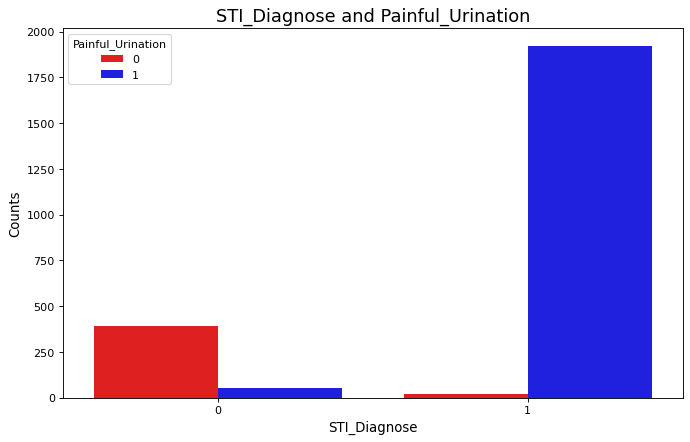

In [7]:
# Select the features for comparison
data = n_data[['STI_Diagnose', 'Painful_Urination']]

# Group the data without filtering out "Moderate Risk"
grouped_data = data.groupby(['STI_Diagnose', 'Painful_Urination']).size().reset_index(name='Counts')

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)

# Replace values with readable text
grouped_data['STI_Diagnose'] = grouped_data['STI_Diagnose']
grouped_data['Painful_Urination'] = grouped_data['Painful_Urination']

# Create the bar plot including all risk levels
sns.barplot(x='STI_Diagnose', y='Counts', hue='Painful_Urination', data=grouped_data, palette=['#FF0000', '#0000FF'])

# Set the title and labels
ax.set_title('STI_Diagnose and Painful_Urination', fontsize=16)
ax.set_ylabel('Counts', size=12)
ax.set_xlabel('STI_Diagnose', size=12)

# Show the plot
plt.show()


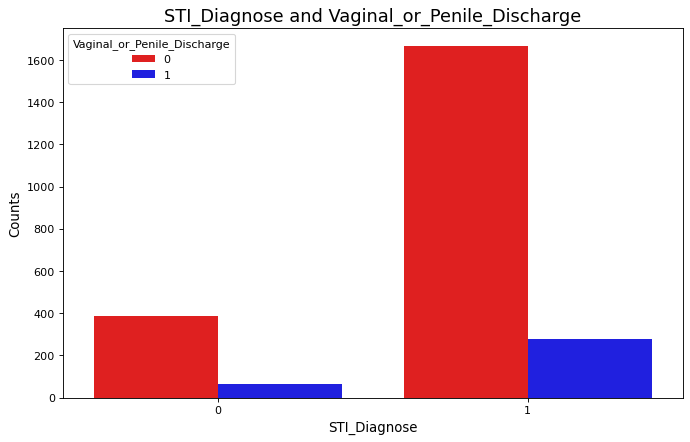

In [8]:
# Select the features for comparison
data = n_data[['STI_Diagnose', 'Vaginal_or_Penile_Discharge']]

# Group the data without filtering out "Moderate Risk"
grouped_data = data.groupby(['STI_Diagnose', 'Vaginal_or_Penile_Discharge']).size().reset_index(name='Counts')

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)

# Replace values with readable text
grouped_data['STI_Diagnose'] = grouped_data['STI_Diagnose']
grouped_data['Vaginal_or_Penile_Discharge'] = grouped_data['Vaginal_or_Penile_Discharge']

# Create the bar plot including all risk levels
sns.barplot(x='STI_Diagnose', y='Counts', hue='Vaginal_or_Penile_Discharge', data=grouped_data, palette=['#FF0000', '#0000FF'])

# Set the title and labels
ax.set_title('STI_Diagnose and Vaginal_or_Penile_Discharge', fontsize=16)
ax.set_ylabel('Counts', size=12)
ax.set_xlabel('STI_Diagnose', size=12)

# Show the plot
plt.show()


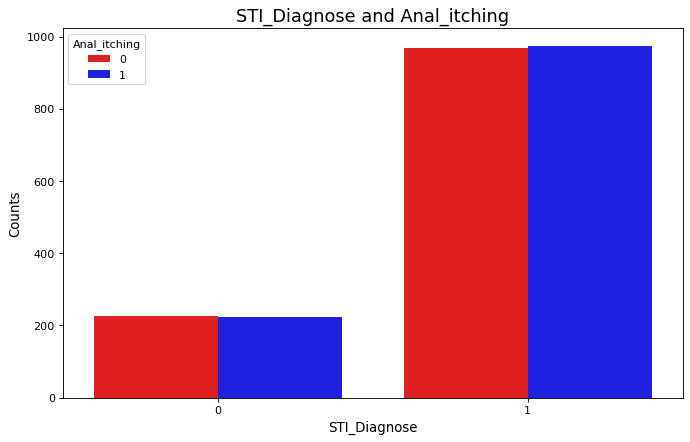

In [9]:
# Select the features for comparison
data = n_data[['STI_Diagnose', 'Anal_itching']]

# Group the data without filtering out "Moderate Risk"
grouped_data = data.groupby(['STI_Diagnose', 'Anal_itching']).size().reset_index(name='Counts')

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)

# Replace values with readable text
grouped_data['STI_Diagnose'] = grouped_data['STI_Diagnose']
grouped_data['Anal_itching'] = grouped_data['Anal_itching']

# Create the bar plot including all risk levels
sns.barplot(x='STI_Diagnose', y='Counts', hue='Anal_itching', data=grouped_data, palette=['#FF0000', '#0000FF'])

# Set the title and labels
ax.set_title('STI_Diagnose and Anal_itching', fontsize=16)
ax.set_ylabel('Counts', size=12)
ax.set_xlabel('STI_Diagnose', size=12)

# Show the plot
plt.show()


In [10]:
x = STI_Diagnose.drop(columns=['STI_Diagnose'])
y = STI_Diagnose['STI_Diagnose']

In [11]:
grouped_data = grouped_data.reset_index(drop=True)

In [12]:
imputer = SimpleImputer(strategy='mean')
x_imputed = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

# Apply SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x_imputed, y)

In [13]:
y.value_counts()

STI_Diagnose
0    1944
1    1944
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)

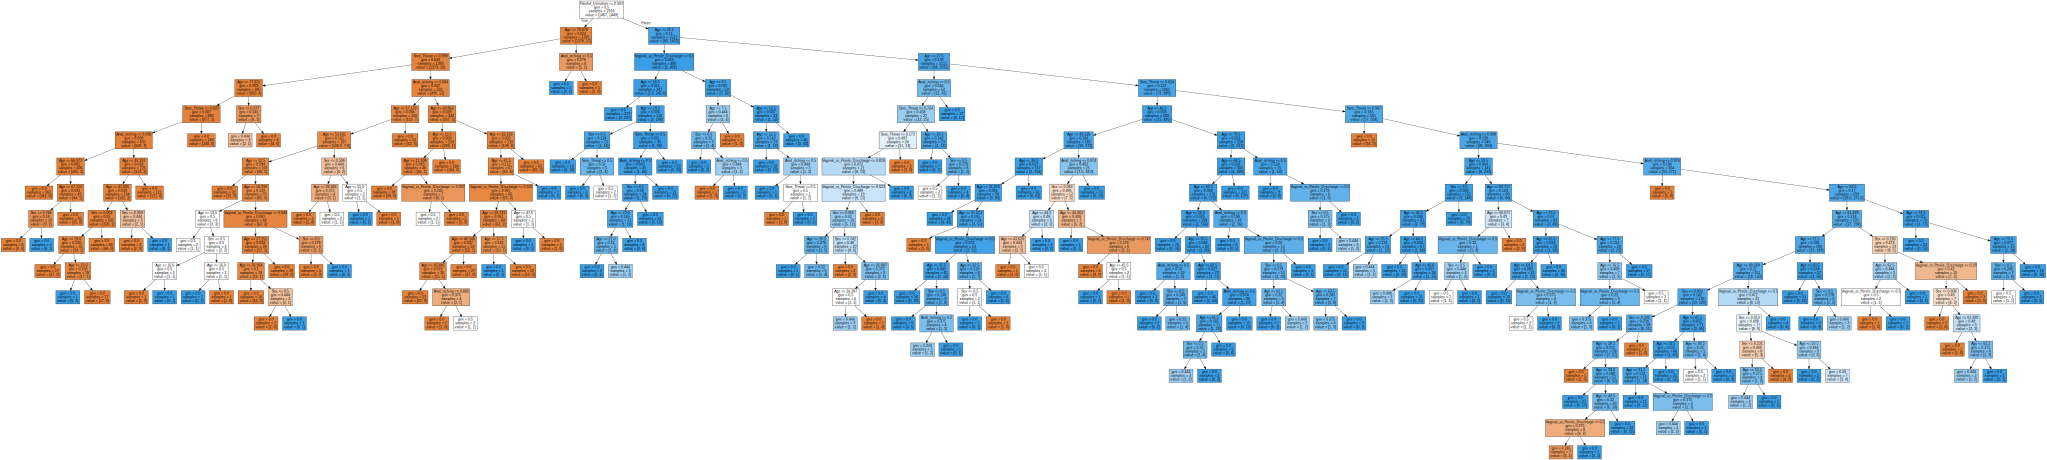

In [15]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from joblib import dump, load
import graphviz

dcs = DecisionTreeClassifier()
dcs.fit(x_train, y_train)
export_graphviz(dcs, out_file='tree.dot', filled=True, feature_names=x_train.columns)
with open('tree.dot') as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

#SAVE EARTH
# dump(dcs, 'decision_tree_model.joblib')

In [16]:
loaded_model = load('decision_tree_model.joblib')
loaded_prediction = loaded_model.predict(x_test)

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score
)

dcs_prediction = dcs.predict(x_test)


accuracy = accuracy_score(y_test, dcs_prediction)


precision = precision_score(y_test, dcs_prediction, average='macro')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")

Accuracy: 95.78%
Precision: 95.86%
